In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | senneterre
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | asheville
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | changtu
Processing Record 17 of Set 1 | barawe
City not found. Skipping...
Processing Record 18 of Set 1 | vicuna
Processing Record 19 of Set 1 | nome
Processing Record 20 of Set 1 | sars
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 |

Processing Record 38 of Set 4 | skibbereen
Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | nyandoma
Processing Record 41 of Set 4 | sao filipe
Processing Record 42 of Set 4 | kalabo
Processing Record 43 of Set 4 | levanger
Processing Record 44 of Set 4 | bud
Processing Record 45 of Set 4 | tatarsk
Processing Record 46 of Set 4 | fez
Processing Record 47 of Set 4 | praia
Processing Record 48 of Set 4 | zhigansk
Processing Record 49 of Set 4 | mackay
Processing Record 50 of Set 4 | ampanihy
Processing Record 1 of Set 5 | aksarka
Processing Record 2 of Set 5 | nikolskoye
Processing Record 3 of Set 5 | nanakuli
Processing Record 4 of Set 5 | muroto
Processing Record 5 of Set 5 | nemuro
Processing Record 6 of Set 5 | marquette
Processing Record 7 of Set 5 | faanui
Processing Record 8 of Set 5 | lucea
Processing Record 9 of Set 5 | lagoa
Processing Record 10 of Set 5 | prince rupert
Processing Record 11 of Set 5 | ngunguru
Processing Record 12 of Set 5 | namatanai


Processing Record 27 of Set 8 | kahului
Processing Record 28 of Set 8 | baruun-urt
Processing Record 29 of Set 8 | andapa
Processing Record 30 of Set 8 | shahr-e babak
Processing Record 31 of Set 8 | mago
Processing Record 32 of Set 8 | conceicao do araguaia
Processing Record 33 of Set 8 | port hardy
Processing Record 34 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 35 of Set 8 | nedjo
Processing Record 36 of Set 8 | san vicente
Processing Record 37 of Set 8 | kidal
Processing Record 38 of Set 8 | alice springs
Processing Record 39 of Set 8 | ust-karsk
Processing Record 40 of Set 8 | coruripe
Processing Record 41 of Set 8 | victoria
Processing Record 42 of Set 8 | ciudad guayana
Processing Record 43 of Set 8 | itarema
Processing Record 44 of Set 8 | hella
Processing Record 45 of Set 8 | isangel
Processing Record 46 of Set 8 | champerico
Processing Record 47 of Set 8 | salta
Processing Record 48 of Set 8 | luganville
Processing Record 49 of Set 8 | tateyama
Proces

Processing Record 17 of Set 12 | tomohon
Processing Record 18 of Set 12 | cartagena
Processing Record 19 of Set 12 | salalah
Processing Record 20 of Set 12 | santa lucia
Processing Record 21 of Set 12 | pacifica
Processing Record 22 of Set 12 | assare
Processing Record 23 of Set 12 | canico
Processing Record 24 of Set 12 | viedma
Processing Record 25 of Set 12 | yabrud
Processing Record 26 of Set 12 | mansa
Processing Record 27 of Set 12 | bull savanna
Processing Record 28 of Set 12 | skjervoy
Processing Record 29 of Set 12 | iqaluit
Processing Record 30 of Set 12 | dicabisagan
Processing Record 31 of Set 12 | bullhead city
Processing Record 32 of Set 12 | pingliang
Processing Record 33 of Set 12 | juifang
City not found. Skipping...
Processing Record 34 of Set 12 | waingapu
Processing Record 35 of Set 12 | ust-ilimsk
Processing Record 36 of Set 12 | cayenne
Processing Record 37 of Set 12 | labutta
City not found. Skipping...
Processing Record 38 of Set 12 | bongandanga
Processing Reco

In [11]:
len(city_data)

545

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Senneterre,48.3835,-77.2328,68.00,34,40,10.36,CA,2021-04-08 22:33:11
1,Punta Arenas,-53.1500,-70.9167,46.40,71,0,21.85,CL,2021-04-08 22:30:56
2,Port Elizabeth,-33.9180,25.5701,60.80,100,90,10.36,ZA,2021-04-08 22:33:11
3,Bluff,-46.6000,168.3333,57.99,78,4,1.99,NZ,2021-04-08 22:33:12
4,East London,-33.0153,27.9116,65.98,82,48,3.96,ZA,2021-04-08 22:33:12
5,Klaksvik,62.2266,-6.5890,30.20,64,75,27.63,FO,2021-04-08 22:33:12
6,Atuona,-9.8000,-139.0333,81.21,70,10,15.57,PF,2021-04-08 22:33:13
7,Asheville,35.6009,-82.5540,68.00,52,75,14.97,US,2021-04-08 22:30:07
8,Kruisfontein,-34.0033,24.7314,60.01,95,4,1.99,ZA,2021-04-08 22:33:13
9,Tasiilaq,65.6145,-37.6368,15.80,79,35,6.91,GL,2021-04-08 22:33:13


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Senneterre,CA,2021-04-08 22:33:11,48.3835,-77.2328,68.00,34,40,10.36
1,Punta Arenas,CL,2021-04-08 22:30:56,-53.1500,-70.9167,46.40,71,0,21.85
2,Port Elizabeth,ZA,2021-04-08 22:33:11,-33.9180,25.5701,60.80,100,90,10.36
3,Bluff,NZ,2021-04-08 22:33:12,-46.6000,168.3333,57.99,78,4,1.99
4,East London,ZA,2021-04-08 22:33:12,-33.0153,27.9116,65.98,82,48,3.96
5,Klaksvik,FO,2021-04-08 22:33:12,62.2266,-6.5890,30.20,64,75,27.63
6,Atuona,PF,2021-04-08 22:33:13,-9.8000,-139.0333,81.21,70,10,15.57
7,Asheville,US,2021-04-08 22:30:07,35.6009,-82.5540,68.00,52,75,14.97
8,Kruisfontein,ZA,2021-04-08 22:33:13,-34.0033,24.7314,60.01,95,4,1.99
9,Tasiilaq,GL,2021-04-08 22:33:13,65.6145,-37.6368,15.80,79,35,6.91


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

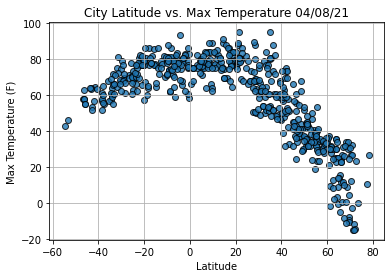

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

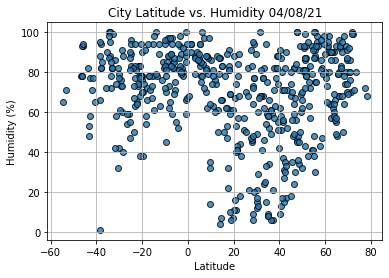

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

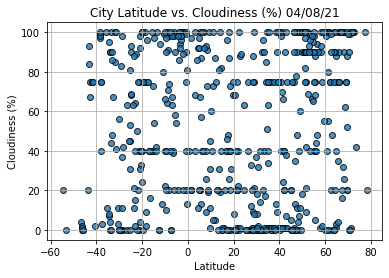

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

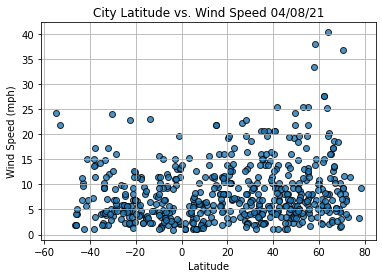

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()